### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Defining Color Constants

In [2]:
BLUE_DARKEST = '#051b2c'
BLUE_DARK = '#0c3759'
BLUE_MEDIUM = '#4789be'
BLUE_LIGHT = '#6ebeec'
BLUE_LIGHTEST = '#95cef2'
OCHRE_LIGHT = '#f3e2c0'

### Reading Data from `sleep.csv` file

In [3]:
df = pd.read_csv('sleep.csv')
df

,Age group,Min age,Max age,Not recommended lower,Approriate lower,Recommended lower,Recommended upper,Appropriate upper,Not recommended upper
0,Newborns,0.00,0.33,11,13,14,17,18,19
1,Infants,0.33,1.00,10,11,12,15,16,18
2,Toddlers,1.00,3.00,9,10,11,14,15,16
3,Preschoolers,3.00,6.00,8,9,10,13,14,15
4,School-aged children,6.00,12.00,7,8,9,12,12,12
5,Teenagers,12.00,18.00,7,7,8,10,11,11
6,Young adults,18.00,25.00,6,6,7,9,11,11
7,Adults,25.00,65.00,6,6,7,9,10,10
8,Older adults,65.00,NaN,5,6,7,8,9,9


### Getting statistical insights into the data

In [4]:
df.describe()

,Min age,Max age,Not recommended lower,Approriate lower,Recommended lower,Recommended upper,Appropriate upper,Not recommended upper
count,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,14.481111,16.291250,7.666667,8.444444,9.444444,11.888889,12.888889,13.444444
std,20.847019,21.517004,2.000000,2.505549,2.505549,3.100179,3.018462,3.643869
min,0.000000,0.330000,5.000000,6.000000,7.000000,8.000000,9.000000,9.000000
25%,1.000000,2.500000,6.000000,6.000000,7.000000,9.000000,11.000000,11.000000
50%,6.000000,9.000000,7.000000,8.000000,9.000000,12.000000,12.000000,12.000000
75%,18.000000,19.750000,9.000000,10.000000,11.000000,14.000000,15.000000,16.000000
max,65.000000,65.000000,11.000000,13.000000,14.000000,17.000000,18.000000,19.000000


### Getting to know about the Null values and data types

- `Max Age` contains 1 null value

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age group              9 non-null      object 
 1   Min age                9 non-null      float64
 2   Max age                8 non-null      float64
 3   Not recommended lower  9 non-null      int64  
 4   Approriate lower       9 non-null      int64  
 5   Recommended lower      9 non-null      int64  
 6   Recommended upper      9 non-null      int64  
 7   Appropriate upper      9 non-null      int64  
 8   Not recommended upper  9 non-null      int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 780.0+ bytes


## Answer 1

> Constructed group bar plot

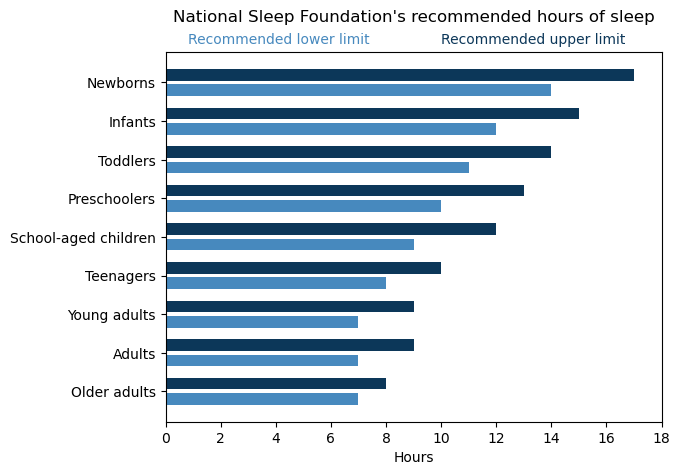

In [6]:
df = df.sort_values(by='Min age', ascending=False)

age_group = df['Age group']
recommended_lower = df['Recommended lower']
recommended_upper = df['Recommended upper']

# Initialized bar_width and bar_gap between the bars
bar_width = 0.3
bar_gap = 0.1

upper_bar_position = np.arange(len(age_group))
lower_bar_position = upper_bar_position + bar_width + bar_gap


fig, ax = plt.subplots()


ax.barh(upper_bar_position, recommended_lower, height=bar_width, label='Recommended Lower limit', color=BLUE_MEDIUM)
ax.barh(lower_bar_position, recommended_upper, height=bar_width, label='Recommended Upper limit', color=BLUE_DARK)

ax.set_xlim(0, 18)
ax.set_xlabel('Hours')
ax.set_yticks((upper_bar_position + lower_bar_position) / 2) # to keep the ticks in the middle of both the bars
ax.set_yticklabels(age_group)
ax.set_title('National Sleep Foundation\'s recommended hours of sleep', pad=22)

# Defining custom legend
ax.text(0.8,9.2,'Recommended lower limit', color=BLUE_MEDIUM)
ax.text(10,9.2,'Recommended upper limit', color=BLUE_DARK)
plt.show()


## Answer 2

> Connected Dot Plot

Text(0.5, 1.0, "National Sleep Foundation's recommended hours of sleep")

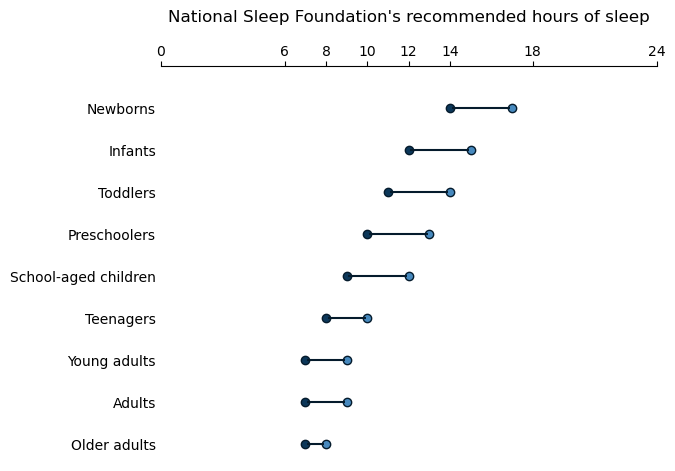

In [9]:
fig, ax = plt.subplots()

# Adjust the lines to the edges of points
ax.hlines(y=age_group, xmin=df['Recommended lower']+0.085, xmax=df['Recommended upper']-0.085, color=BLUE_DARKEST)
ax.scatter(df['Recommended lower'], age_group, color=BLUE_DARK, edgecolors=BLUE_DARKEST, label='Recommended lower')
ax.scatter(df['Recommended upper'], age_group, color=BLUE_MEDIUM, edgecolors=BLUE_DARKEST, label='Recommended upper')

custom_xticks = [0, 6, 8, 10, 12, 14, 18, 24]
ax.set_xticks(custom_xticks)
ax.set_xticklabels(custom_xticks)

# Adjustments of spines and tick parameters
ax.spines.bottom.set_position(('data', 9))
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.tick_params(axis='x', which='both', labelrotation=0, direction='in', pad=-15)
ax.tick_params(axis='y', length=0)
ax.set_title('National Sleep Foundation\'s recommended hours of sleep', pad=50)


## Answer 3

In [8]:
## Marimekko chart

## Attributions

- Multiple Bar Plots - https://matplotlib.org/2.0.2/examples/api/barchart_demo.html

- Connected Dot Plots - https://python-graph-gallery.com/184-lollipop-plot-with-2-groups/

- Setting edge colors to points - https://www.tutorialspoint.com/how-to-set-the-border-color-of-the-dots-in-matplotlib-s-scatterplots#:~:text=Plot%20the%20x%20and%20y,figure%2C%20use%20show()%20method.

- Adjustment of title padding - https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

- Using Matplotlib text() - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

- Adjustment of tick parameters - https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html